# Vehicle Type Detection

In this project, I am going to make a **deep learning model** which can classify a set of images into **several types of vehicles**. 

For the deep learning model, I will be using **CNN** (Convolutional Neural Network) which is mainly supported by the **Keras** library.

Written By: **Kevin Christian**

# Task 1: Import Libraries

First of all, we should **import** all of the **necessary libraries** for our model.

Second, we will see the **TensorFlow version** that we are going to use for this model.

Third, we should know whether we use **external GPUs**. In this case, **we do not need** any additional GPU as **the size** of the dataset is **not too big** and the **model** is **not too complex**.

In [9]:
# First of all, we should import all of the necessary libraries for our model.

import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
  os.mkdir('models')

# Second, we will see the TensorFlow version that we are going to use for this model.
    
print('TensorFlow version:', tf.__version__)

# Third, we should know whether we use external GPUs. In this case, we do not need 
# any additional GPU as the size of the dataset is not too big.

print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.4.0
Is using GPU? False


# Task 2: Preprocess Data

In this part, we are going to create a function which can **eliminate irrelevant images**, so that we will only get the required set of images.

In this case, we are going to use the **CIFAR10** dataset from https://www.cs.toronto.edu/~kriz/cifar.html 

**The labels** of the CIFAR10 dataset are as follows:

['**airplane**', '**automobile**', '**bird**', '**cat**', '**deer**', '**dog**', '**frog**', '**horse**', '**ship**', '**truck**']

Since our aim for this project is to do **vehicle image classification**, we will only use the **airplane**, **automobile**, **ship**, and **truck** images.

For that reason, we select **0, 1, 8, 9** as the **indices**.

Now, we should **select all images** from **x and y** with the index listed in the **indices**.

After that, we will define another variable called **selected_index** which will **shuffle all the index**, so that the model **won't be bias** due to the **same order** of the images.

Lastly, we will **encode** the labels into **binary classification**. This is because **CNN** won't be able to read **categorical data**.

In [10]:
# In this part, we are going to create a function which can eliminate irrelevant images, 
# so that we will only get the required set of images.

# In this case, we are going to use the CIFAR10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html

# The function below takes in 2 arguments, which are the feature dataset and the labels.

def get_vehicle_classes(x, y):

  # The labels of CIFAR10 are as follows:

  # ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

  # Since our aim for this project is to do vehicle image classification, 
  # we will only use the airplane, automobile, ship, and truck images.

  # For that reason, we select 0, 1, 8, 9 as the indices.

  indices_0, _ = np.where(y == 0.)
  indices_1, _ = np.where(y == 1.)
  indices_8, _ = np.where(y == 8.)
  indices_9, _ = np.where(y == 9.)

  indices = np.concatenate([indices_0, indices_1, indices_8, indices_9], axis=0)
    
  # Now, we should select all images from x and y with the index listed in the indices.

  x = x[indices]
  y = y[indices]
    
  count = x.shape[0]

  # After that, we will define another variable called selected_index which will shuffle all the index, 
  # so that the model won't be bias due to the same order of the images.

  selected_index = np.random.choice(range(count), count, replace=False)
    
  x = x[selected_index]
  y = y[selected_index]
  
  # Lastly, we will encode the labels into binary classification. 
  # This is because CNN won't be able to read categorical data.

  y = tf.keras.utils.to_categorical(y)
    
  return x, y

Now, we should make the **training** and **test** datasets from the **CIFAR10** dataset.

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, y_train = get_vehicle_classes(x_train, y_train)
x_test, y_test = get_vehicle_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(20000, 32, 32, 3) (20000, 10)
(4000, 32, 32, 3) (4000, 10)


# Task 3: Visualize Examples

In this task, we are going to visualize some of the images from both the training and the test images.

That's why, we define a function which can show random images, taking in 3 arguments, which are the features, labels, and the value for the prediction (also labels).

This function will make a subplot of 2 rows and 5 columns that consists of 10 images with the picked indices.

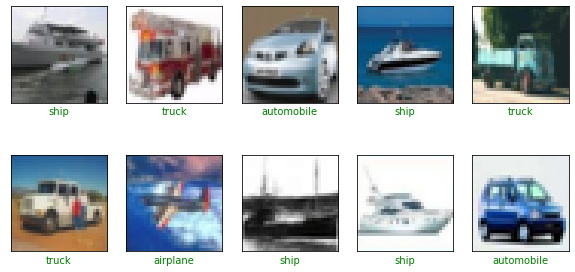

In [12]:
# Firstly, we should make the class_names for our predicted image labels.

class_names = ['airplane', 'automobile', 'ship', 'truck']

# define a function which can show random images, with 3 parameters, 
# which are the features, original labels, and the prediction labels (which is also the original labels).

def show_random_examples(x, y, p):

  # Pick 10 random numbers from the range of 0 to the length of the features.

  indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
  x = x[indices]
  y = y[indices]
  p = p[indices]
    
  plt.figure(figsize=(10, 5))

  # This function will make a subplot of 2 rows and 5 columns that consists 
  # of 10 images with the picked indices.

  for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i])

    # remove the x-axis values and the y-axis values

    plt.xticks([])
    plt.yticks([])

    # In this case np.argmax chooses the index which has the greatest value 
    # of probability among the other indexes.

    # y[i] is the ith image of the original labels
    # p[i] is the ith image of the prediction labels

    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'

    # In the case the predicted label is more than 3, it will create an error
    # when we use it as an index for the class_names

    # For that reason, I made an if-else statement to resolve this issue.

    if np.argmax(p[i]) > 3:
      plt.xlabel(class_names[3-(9-np.argmax(p[i]))], color=col)
    else:
      plt.xlabel(class_names[np.argmax(p[i])], color=col)

  plt.show()

show_random_examples(x_train, y_train, y_train)

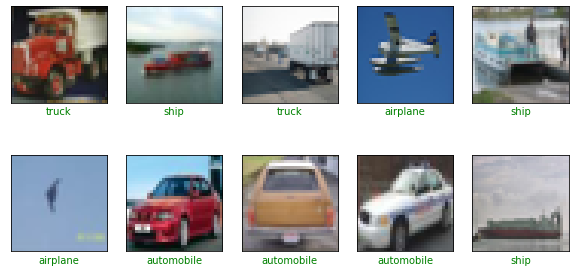

In [13]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

## **Conv2D Representation**

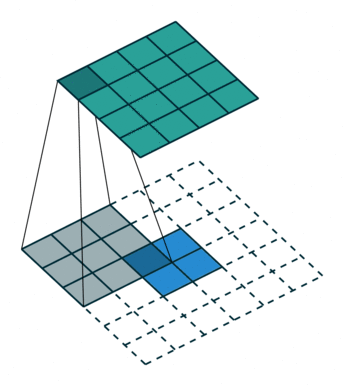

## **Padding Representation**

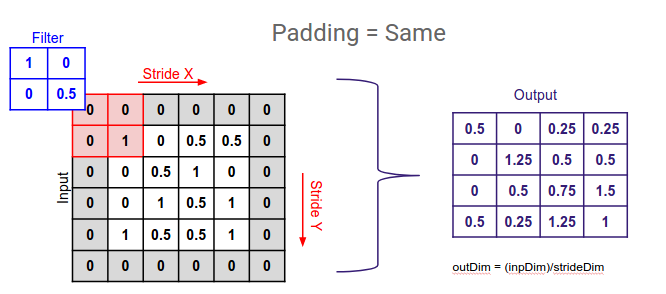

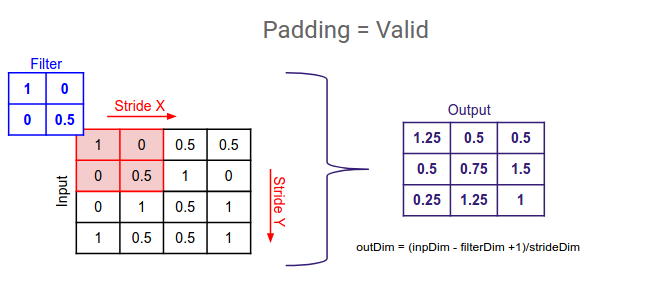

## **MaxPooling2D Representation**

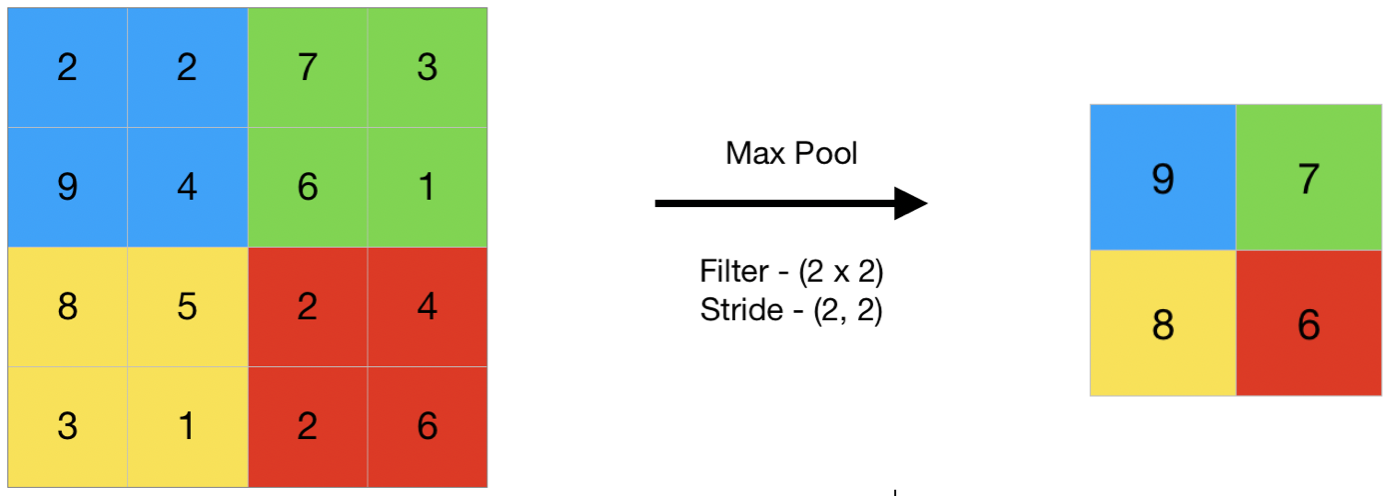

However the above representation happen when strides = (2, 2). But if you don't set any value for strides, the strides value will be (1, 1) by default.

Thus, if the strides value is (1, 1), then the output will be a 3x3 matrix which is 

[[9, 7, 7],<br>
 [9, 6, 6],<br>
 [8, 5, 6]]

 As the 2x2 filter will be shifted by 1 pixel in every iteration.

## **Dropout Representation**

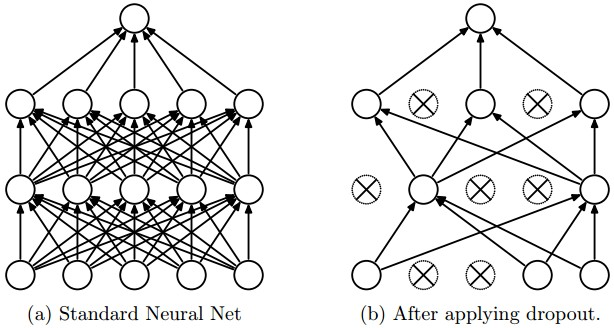

## **Flatten Representation**

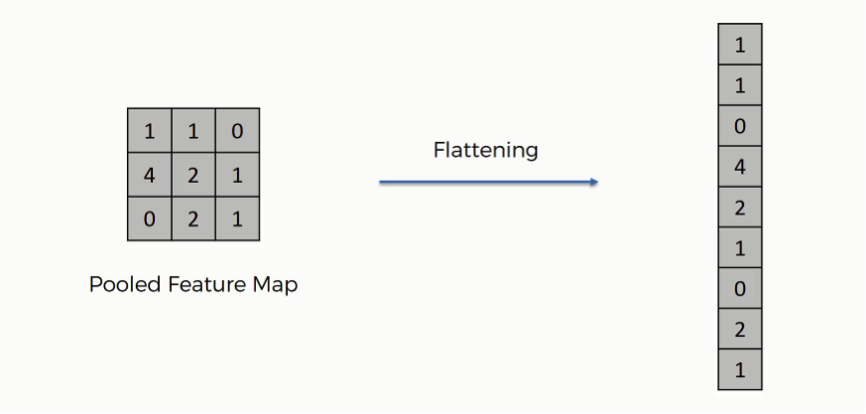

## **Dense Layers Representation**

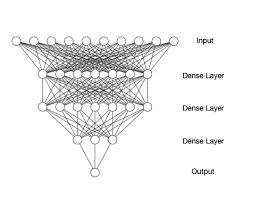

## **Stochastic Gradient Descent Representation**

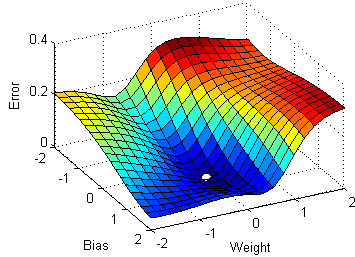

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

# First, we define a function which can create a model

def create_model():

  # Inside this function, we are going to make the add_conv_block method, 
  # which adds 5 layers to the model.

  # This function takes 2 arguments which are the model itself and the number
  # of filters

  def add_conv_block(model, num_filters):

      # First, we will add a Conv2D layer.

      # Conv2D is a layer that consists of a set of “filters”. 
      # The filters take a subset of the input data at a time, 
      # but are applied across the full input (by sweeping over the input)

      model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))

      # The number of filters is the number of neurons. 
      # Each neuron performs a different convolution on the input to the layer.
      # For instance, if num_filters = 32, then the model will learn 32 features
      # from the input.

      # 3 indicates the kernel size of the layer.

      # The activation function 'relu' means that whenever the output value is 
      # positive, then it stays the same. Otherwise, it will become 0.

      # Padding is used so that the information on the borders of images are
      # preserved as well as the information in the middle.

      # Padding works by adding layers of zeros along the sides and corners of the input image.

      # padding = 'same', means that padding is applied so that the size of the output image
      # is still the same as the input image

      # Next, we have the BatchNormalization layer, which is used to re-scale 
      # the inputs using normalization so that the model can run faster.

      model.add(BatchNormalization())

      # In the next layer, we will add a Conv2D layer, but with padding = 'valid'
      # This means that no padding is used, so that the size of the output image is reduced.

      model.add(Conv2D(num_filters, 3, activation='relu', padding='valid'))

      # The next layer will be MaxPooling2D

      # This layer is useful for downsampling the input image representation by 
      # taking the maximum value over the kernel with a size of (pool_size, pool_size)
      # for each dimension along the feature axis.

      model.add(MaxPooling2D(pool_size=2))

      # The Dropout layer randomly sets input units to 0 with a frequency of 
      # rate at each step during training time, which helps prevent overfitting. 
      
      # Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

      model.add(Dropout(0.2))

      return model

  # Sequential groups a linear stack of layers into a tf.keras.Model.  

  model = tf.keras.models.Sequential()

  # The shape of the input should be the same as the size of the images that we are going to use.

  model.add(Input(shape=(32, 32, 3)))
    
  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)

  # After that, we should add the Flatten layer, which is useful to reduce the dimensionality
  # of the input image.

  # It works by turning a multidimensional representation of an image into a 1D vector of numbers.

  model.add(Flatten())

  # The last layer that we will use is a Dense layer, which is usually used 
  # when association can exist among any feature to any other feature in data point.

  # 10 indicates the number of nodes in the Dense layer
  # The softmax function works by normalizing the input values into a vector
  # of values between 0 and 1, whose total sums up to 1.
  # The model will then choose a class whose softmax value is the largest among the other classes.

  model.add(Dense(10, activation='softmax'))

  # The loss function 'categorical_crossentropy' computes the crossentropy loss 
  # between the labels and predictions.

  # Optimizers are algorithms or methods used to change the attributes of your 
  # neural network such as weights and learning rate in order to reduce the losses.

  # In this case, we use the 'adam' optimizer.
  # Adam optimization is a stochastic gradient descent method that is based on 
  # adaptive estimation of first-order and second-order moments.

  # Lastly, the most important feature that we will be taking a look at is 
  # definitely the accuracy of the model.

  # Therefore, I typed metrics = ['accuracy'].

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 64)       

# Task 5: Train the Model

Using the **ModelCheckpoint** with **save_best_only = True**, we will have several models saved in our working directory. 

For clarification, please take a look at the following picture:

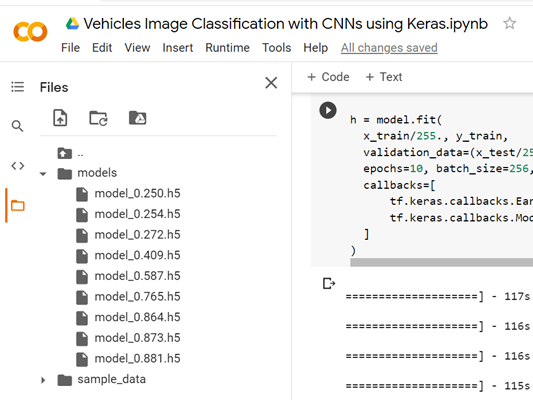




In [17]:
# It is important to divide the x_train and x_test by 255 as RGB is usually 
# represented as a tuple of 3 numbers ranging from 0 to 255.

# The main reason is to make sure that the numbers are in range (0, 1).

# The number of epochs is the number of complete passes through the training dataset.
# epochs = 10 means that the model will be going through the full training datasets for 10 times.

# batch_size is a number of samples processed before the model weights are updated.

# (EarlyStopping with patience = 2) means that the model will stop the training process,
# whenever the accuracy_score does not increase significantly for two epochs.

# ModelCheckpoint with save_best_only means that the model will save the training progress for every epoch,
# it only saves when the model is considered the "best".

# The latest best model according to the quantity monitored will not be overwritten.

h = model.fit(
  x_train/255., y_train,
  validation_data=(x_test/255., y_test),
  epochs=10, batch_size=256,
  callbacks=[
      tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
      tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5', save_best_only=True, save_weights_only=False, monitor='val_accuracy')
  ]
)

Epoch 1/10
79/79 [==============================] - 117s 1s/step - loss: 1.0296 - accuracy: 0.5900 - val_loss: 2.4681 - val_accuracy: 0.2503
Epoch 2/10
79/79 [==============================] - 116s 1s/step - loss: 0.6735 - accuracy: 0.7383 - val_loss: 3.4678 - val_accuracy: 0.2540
Epoch 3/10
79/79 [==============================] - 116s 1s/step - loss: 0.5382 - accuracy: 0.7979 - val_loss: 3.8915 - val_accuracy: 0.2722
Epoch 4/10
79/79 [==============================] - 115s 1s/step - loss: 0.4441 - accuracy: 0.8346 - val_loss: 3.7262 - val_accuracy: 0.2618
Epoch 5/10
79/79 [==============================] - 117s 1s/step - loss: 0.3966 - accuracy: 0.8528 - val_loss: 2.2810 - val_accuracy: 0.4090
Epoch 6/10
79/79 [==============================] - 115s 1s/step - loss: 0.3365 - accuracy: 0.8760 - val_loss: 1.1982 - val_accuracy: 0.5875
Epoch 7/10
79/79 [==============================] - 116s 1s/step - loss: 0.3040 - accuracy: 0.8892 - val_loss: 0.6539 - val_accuracy: 0.7645
Epoch 8/10
79

The model that I created does not seem to be too complex. But, since I **did not use** any additional GPU, it would still require **20 to 30 minutes** for the training process.

# Task 6: Final Predictions

In the final task, we are going to plot **2 graphs** which demonstrate the flow of **the loss function** and **the accuracy score** progress against **the number of epochs**.

Since the best model that we have is the one with the accuracy score of **0.881**, we will use the file '**model_0.881.h5**' to predict the labels in our test images.

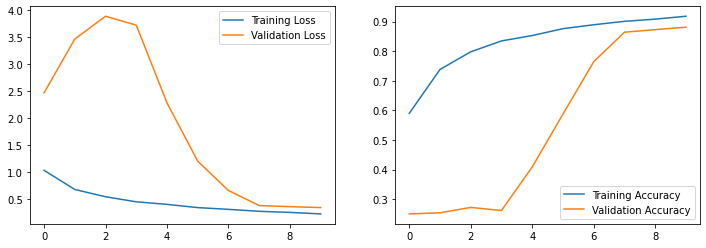

In [18]:
losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
  plt.subplot(1, 2, i + 1)
  plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
  plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
  plt.legend()
plt.show()

In [20]:
model = tf.keras.models.load_model('models/model_0.881.h5')
preds = model.predict(x_test/255.)

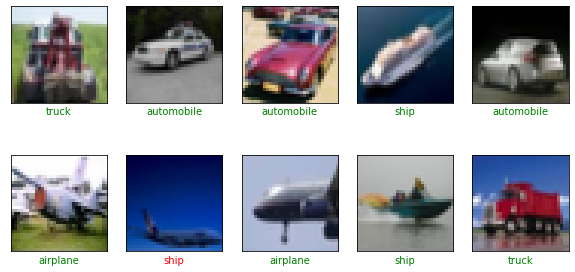

In [22]:
show_random_examples(x_test, y_test, preds)

As you can see, the **correctly** predicted labels are in **green** color, while the **wrong labels** are in **red** colors.

# Conclusion



This is **the end** of my project, **thank you** so much for taking a look through my notebook.

In real life, people usually make **models with higher complexity** for their deep learning projects. 

However, it **does not mean** that they should build up their models **from scratch**. They can actually modify the **pre-trained models** such as **ImageNet** (for Computer Vision) and **OpenAI’s GPT-3** (for Natural Language Processing) by adding more layers according to their needs.

This is what we called **Transfer Learning**.

Usually, when the model has a really high complexity, people start to **use additional GPU**, so that the training process can be done **much faster**. But most importantly, their computers will **have lower risk** of being crashed.

If you find some incorrect information or would like to suggest some improvements, do **feel free to provide me a feedback**.